# Применение критерия $χ^2$ Пирсона к проверке гипотезы о виде функции распределения.

## 1. Подготовка

### 1.1 Загружаем все нужные библиотеки

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
from IPython.display import display, Math, Latex
import math

### 1.2 Импортируем нужную выборку из файла

In [35]:
df = pd.read_csv ('data1.csv',sep='\t', header=None, decimal=",")
df = df.astype('float')
pd.set_option('display.expand_frame_repr', False)

heading_properties = [('font-size', '18px')]
cell_properties = [('font-size', '14px')]



dfstyle = [dict(selector="th", props=heading_properties), dict(selector="td", props=cell_properties)]

df.style.set_table_styles(dfstyle)

print(df)

        0      1      2      3      4      5      6      7      8      9
0   1.152  0.650  1.115  1.371  0.654  1.189  0.935  1.518  1.420  0.511
1   1.153  1.228  1.241  1.323  1.745  1.305  1.486  0.582  1.080  1.068
2   1.084  0.650  0.628  0.666  3.041  0.991  1.074  1.540  0.487  0.432
3   1.103  1.523  3.052  1.144  1.432  0.541  1.470  0.517  0.677  1.412
4   1.391  0.909  0.974  1.527  1.032  0.619  1.172  0.994  1.263  1.009
5   0.819  1.198  1.857  0.740  1.059  1.188  2.016  0.461  0.876  0.715
6   0.417  1.292  0.751  0.299  0.788  0.694  0.637  0.566  0.513  0.424
7   1.448  0.379  1.235  0.247  2.698  1.415  3.237  1.189  1.082  1.076
8   1.246  1.132  1.525  1.218  1.596  0.664  0.594  0.505  0.684  0.716
9   1.081  1.269  1.521  0.960  5.313  0.455  1.046  1.391  0.735  4.653
10  1.011  1.945  1.332  1.500  0.472  0.580  0.503  0.869  3.095  0.427
11  2.611  1.088  2.296  0.713  0.975  0.466  1.796  1.273  2.664  2.516
12  1.559  1.004  0.717  0.581  0.881  1.319  0.796

## 2. Крайние члены вариационного ряда и размах выборки

In [36]:
n = df.shape[0] * df.shape[1]
print('Количество элементов n:', n)

Количество элементов n: 150


In [37]:
df_min = df.to_numpy().min()
md('$X_{{(1)}} = {}$'.format(df_min))


$X_{(1)} = 0.247$

In [38]:
df_max = df.to_numpy().max()
md('$X_{{(n)}} = X_{} = {}$'.format('{{({})}}'.format(n), df_max))

$X_{(n)} = X_{(150)} = 5.313$

In [39]:
df_diff = df_max - df_min
md('$\omega = X_{{(n)}} - X_{{(1)}} = {}$'.format(df_diff))

$\omega = X_{(n)} - X_{(1)} = 5.066$

## 3. Группировка данных (количество интервалов находим по правилу Стерджеса) 

### 3.1 Находим число интервалов

In [40]:
l = math.trunc(1 + np.log2(n))
print('Количество интервалов l = {}'.format(l))

Количество интервалов l = 8


### 3.2 Находим шаг интервалов

In [41]:
h = df_diff / l
print('Размер интервалов h = {}'.format(h))

Размер интервалов h = 0.63325


### 3.3 Построение гистограммы

#### Для построения гистограммы нам понадобится сначала столбец средних точек на каждом интервале:

In [42]:
intervals = [(round(df_min + i * h, 3), round(df_min + (i + 1) * h, 3)) for i in range(l)]
intervals

[(0.247, 0.88),
 (0.88, 1.514),
 (1.514, 2.147),
 (2.147, 2.78),
 (2.78, 3.413),
 (3.413, 4.046),
 (4.046, 4.68),
 (4.68, 5.313)]

In [43]:
histogram = pd.DataFrame()
interval_rows = ['[{}, {})'.format(val[0], val[1]) for val in intervals]
interval_rows[l - 1] = '[{}, {}]'.format(intervals[l - 1][0], intervals[l - 1][1])
histogram['Интервалы'] = interval_rows
histogram['Середины интервалов'] = [(val[0] + val[1]) / 2 for val in intervals]
histogram

,Интервалы,Середины интервалов
0,"[0.247, 0.88)",0.5635
1,"[0.88, 1.514)",1.1970
2,"[1.514, 2.147)",1.8305
3,"[2.147, 2.78)",2.4635
4,"[2.78, 3.413)",3.0965
5,"[3.413, 4.046)",3.7295
6,"[4.046, 4.68)",4.3630
7,"[4.68, 5.313]",4.9965


#### Ну а дальше нужно посчитать количество точек, которые входят в каждый из интервалов:

In [44]:
histogram['Количество точек'] = [0 for i in range(l)]

for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        value = float(df.at[i, j])
        for k in range(l):
            if value >= intervals[k][0] and value < intervals[k][1]:
                histogram.iat[k, 2] += 1
                break
                
        if value == intervals[l - 1][1]:
            histogram.iat[l - 1, 2] += 1
histogram

,Интервалы,Середины интервалов,Количество точек
0,"[0.247, 0.88)",0.5635,55
1,"[0.88, 1.514)",1.1970,65
2,"[1.514, 2.147)",1.8305,18
3,"[2.147, 2.78)",2.4635,6
4,"[2.78, 3.413)",3.0965,4
5,"[3.413, 4.046)",3.7295,0
6,"[4.046, 4.68)",4.3630,1
7,"[4.68, 5.313]",4.9965,1


#### Убедимся, что все точки вошли в интервалы:

In [45]:
print('Количество точек: {}'.format(histogram['Количество точек'].sum()))

Количество точек: 150


#### Посчитаем относительные частоты:

In [46]:
histogram['Относительная частота'] = histogram['Количество точек'] / n
histogram

,Интервалы,Середины интервалов,Количество точек,Относительная частота
0,"[0.247, 0.88)",0.5635,55,0.366667
1,"[0.88, 1.514)",1.1970,65,0.433333
2,"[1.514, 2.147)",1.8305,18,0.120000
3,"[2.147, 2.78)",2.4635,6,0.040000
4,"[2.78, 3.413)",3.0965,4,0.026667
5,"[3.413, 4.046)",3.7295,0,0.000000
6,"[4.046, 4.68)",4.3630,1,0.006667
7,"[4.68, 5.313]",4.9965,1,0.006667


## 4. Построение Гистограммы относительных частот

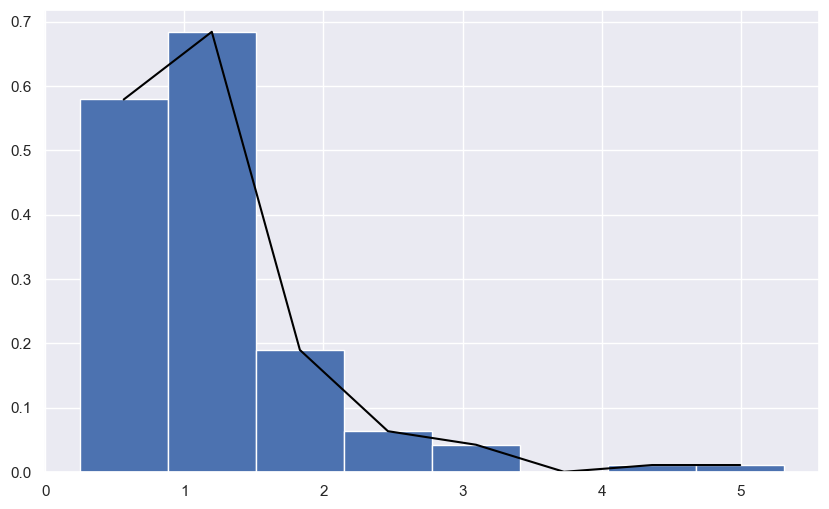

In [47]:
import seaborn as sns
sns.set_theme()
plt.figure(figsize=(10,6))
x = histogram['Середины интервалов']
y = [i / h for i in histogram['Относительная частота']]
plt.bar(x, y, width=h)
plt.plot(x, y, color = 'black')
plt.show()

По виду гистограммы заключаем, что распределение эмпирических частот похоже на нормальный закон

## 5. Выборочные характеристики

### 5.1 Выборочное среднее

In [48]:
x_mean = 0
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        value = float(df.at[i, j])
        x_mean += value
        
x_mean /= n
md('Выборочное среднее <ins>X</ins> = {}'.format(round(x_mean, 3)))

Выборочное среднее <ins>X</ins> = 1.179

In [49]:
x_mean_squared = 0
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        value = float(df.at[i, j]) ** 2
        x_mean_squared += value
        
x_mean_squared /= n
md('Среднее суммы квадратов <ins>X</ins> = {}'.format(round(x_mean_squared, 3)))

Среднее суммы квадратов <ins>X</ins> = 1.939

### 5.2 Выборочная дисперсия

In [50]:
s_2 = 0

for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        value = float(df.at[i, j])
        s_2 += (value - x_mean) ** 2
        
s_2 /= (n - 1)
md('Выборочная дисперсия $S^2$ = {}'.format(round(s_2, 3)))

Выборочная дисперсия $S^2$ = 0.552

<font size="6">$M_\xi = \frac{1}{n}\sum_{i=1}^nx_i = x_{mean}$</font>

<font size="6">$M_{\xi^2} = \frac{1}{n}\sum_{i=1}^nx_i^2 = x_{mean squared}$</font>

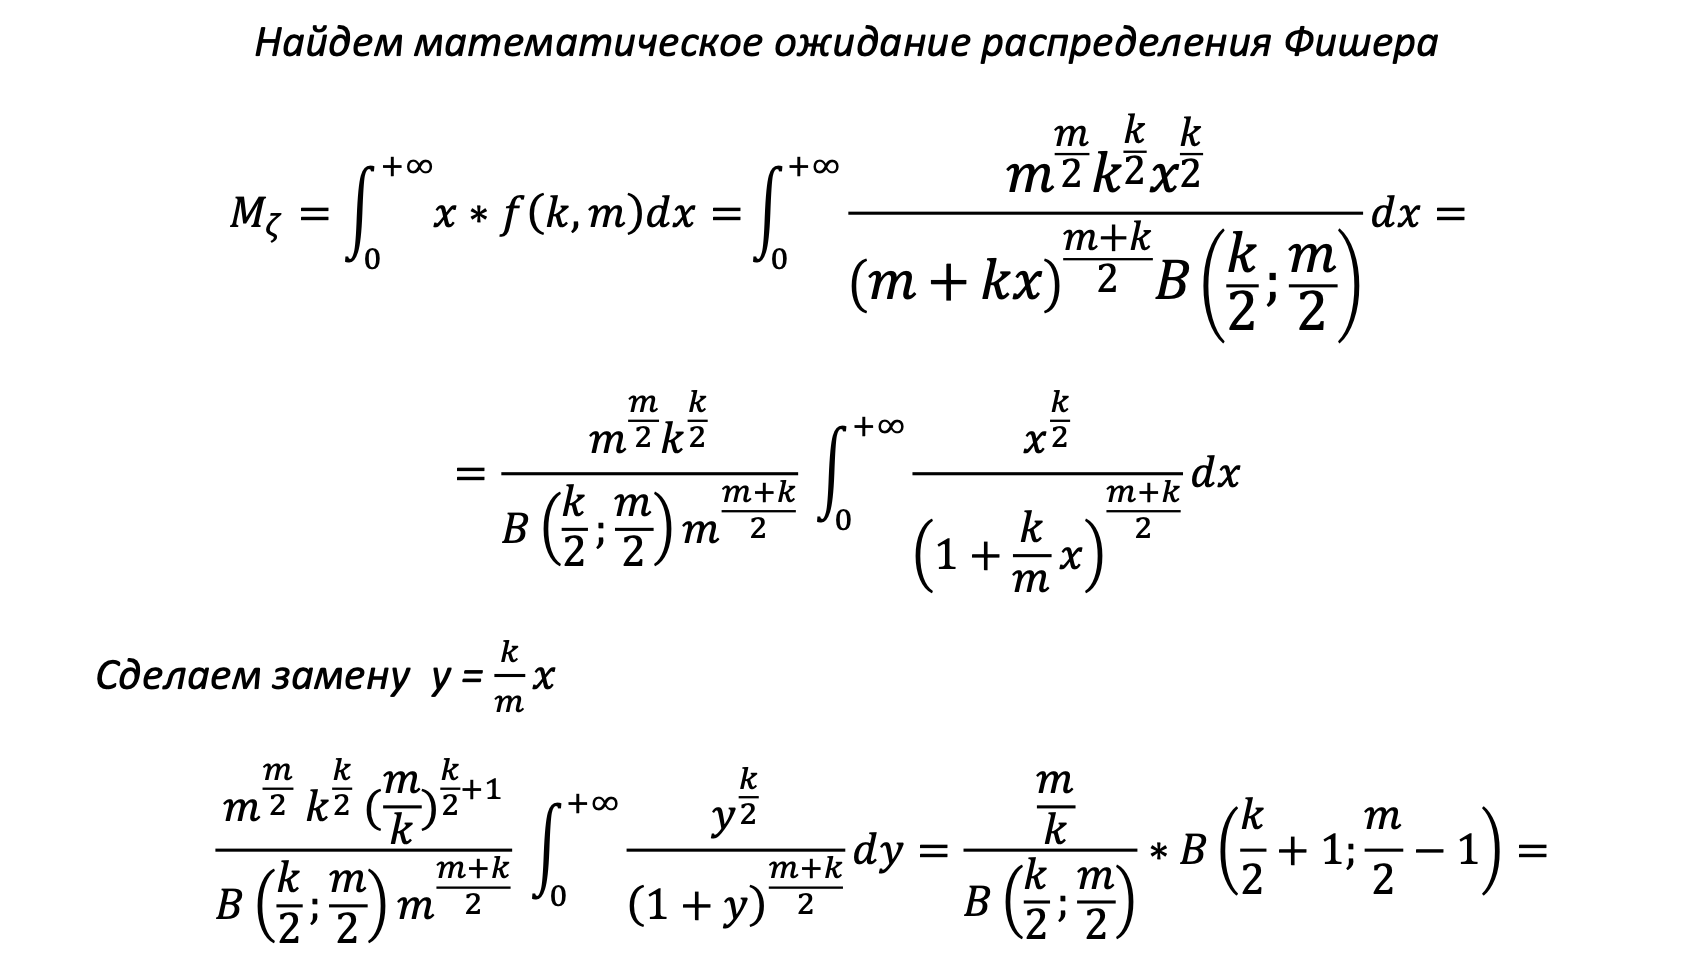

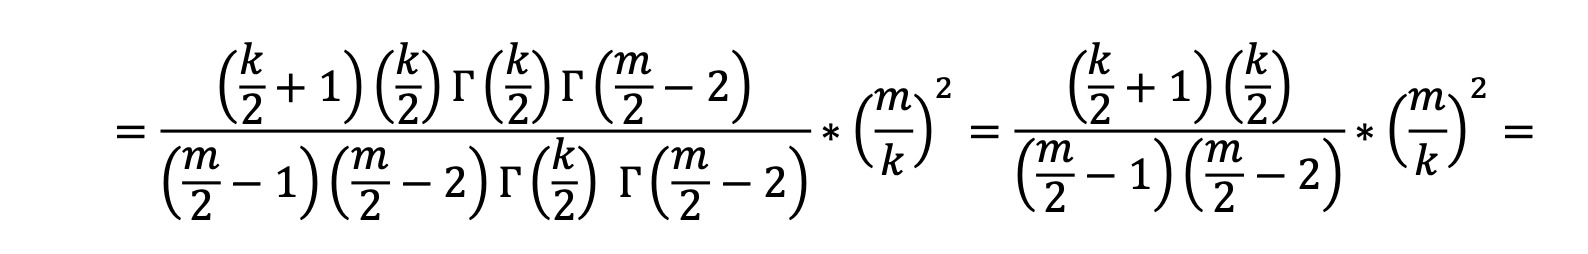

<font size="6">$ = \frac{m}{m-2} = x_{mean}$</font>

<font size="6">$m = \frac{2x_{mean}}{x_{mean}-1}$</font>

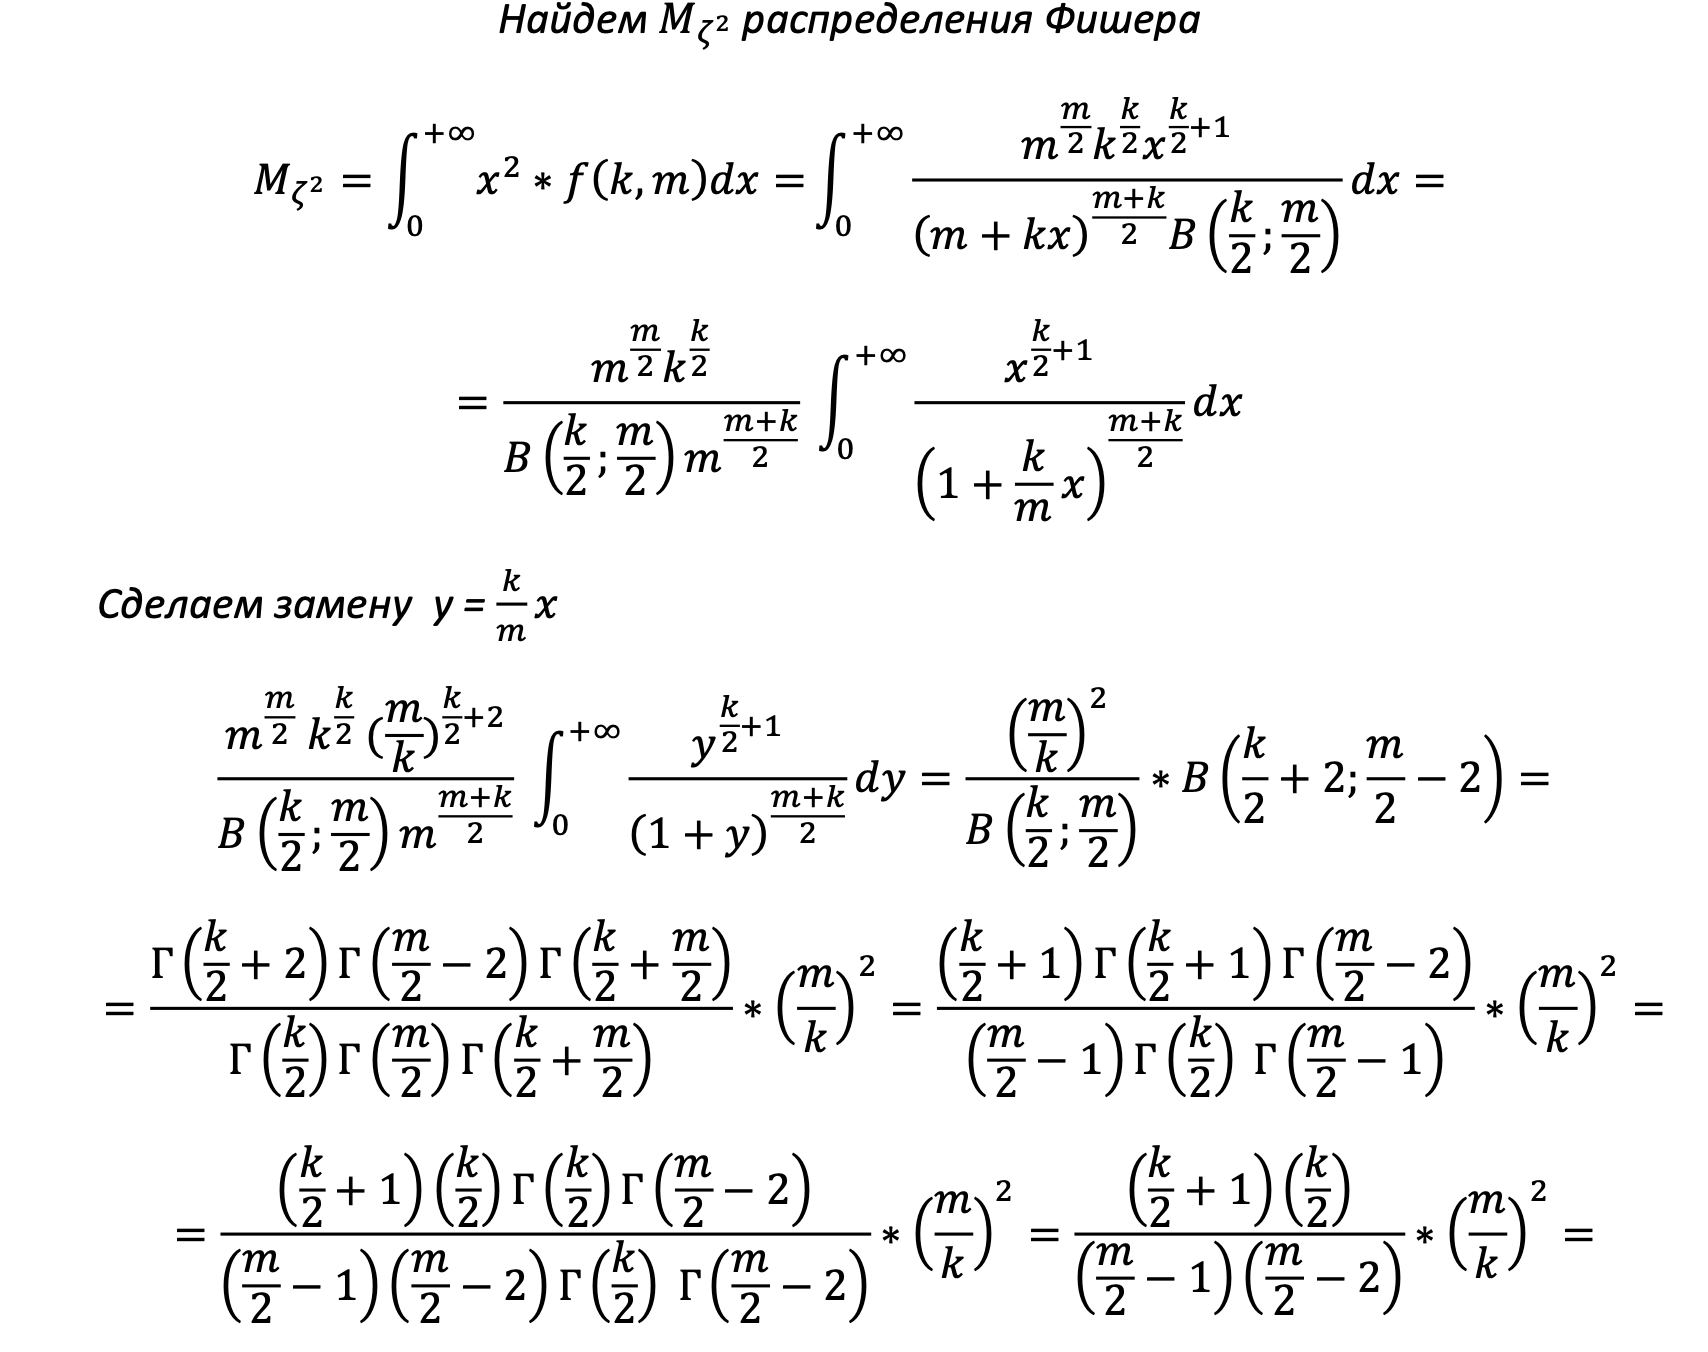

<font size="6">$\frac{(\frac{1}{2}+\frac{1}{k})*2m^2}{(m-2)(m-4)} = x_{meansquared}$</font>

<font size="6">$k = \frac{2m^2}{x_{meansquared}(m-2)(m-4)-m^2}$</font>

Нахождение теоретических вероятностей. Определяем неизвестные параметры методом моментов

In [51]:
m = 2 * x_mean / (x_mean - 1)
m

13.15448968209707

In [52]:
k = 2 * m ** 2 / (x_mean_squared * (m - 2) * (m - 4) - m ** 2)
k

13.875789342482795

## 7. Вычисление статистики $χ_в^2$ и квантили $χ_{(1-α)}^2 (m1)$:

$$χ_в^2 = \sum_{i=1}^{m} \frac{{(\nu_i-{np}_i)}^2}{np_i}$$

#### Необходимо посчитать теоретические частоты. Считать мы их будет по формулам:

#### Рассмотрим интервал [$a_i$, $b_i$). Тогда его теоретическая частота будет равна:

$$\nu_i = n * P(a_i \leq x < b_i) = n * (F(b_i) - F(a_i))$$

#### Исключение составит последний интервал, который будет вычисляться следующим образом:

$$\nu_m = n * (1 - \sum_{i=1}^{n-1} P(a_i \leq x < b_i))$$

In [53]:
from scipy.stats import f

alpha = 0.01 
teoretic_quantities = [n * (f.cdf(intervals[i][1], k, m)
                            - f.cdf(intervals[i-1][1], k, m))
                       for i in range(1, len(intervals) - 1)]
teoretic_quantities.insert(0, n * (f.cdf(intervals[0][1], k, m)))

teoretic_quantities.append(n - sum(teoretic_quantities))


table = pd.DataFrame()
table['Интервал'] = histogram['Интервалы']
table['Эмпирические частоты'] = histogram['Количество точек']
table['Теоретические частоты'] = teoretic_quantities
table = table.transpose()
table

,0,1,2,3,4,5,6,7
Интервал,"[0.247, 0.88)","[0.88, 1.514)","[1.514, 2.147)","[2.147, 2.78)","[2.78, 3.413)","[3.413, 4.046)","[4.046, 4.68)","[4.68, 5.313]"
Эмпирические частоты,55,65,18,6,4,0,1,1
Теоретические частоты,61.034637,54.486458,21.275437,7.749258,3.002491,1.262088,0.573668,0.615963


Объединим интервалы 4-7

In [54]:
table.iloc[1, 4] = table.iloc[1, 4] + 2
table.iloc[2, 4] += table.iloc[2, 5] + table.iloc[2, 6] + table.iloc[2, 7]
table = table.drop(columns=[5, 6, 7])
table

,0,1,2,3,4
Интервал,"[0.247, 0.88)","[0.88, 1.514)","[1.514, 2.147)","[2.147, 2.78)","[2.78, 3.413)"
Эмпирические частоты,55,65,18,6,6
Теоретические частоты,61.034637,54.486458,21.275437,7.749258,5.45421


#### Проверка:

In [55]:
print(sum(teoretic_quantities))

150.0


In [56]:
tmp = (table.transpose()['Эмпирические частоты'] - table.transpose()['Теоретические частоты']) ** 2
arr = tmp / table.transpose()['Теоретические частоты']
xv_2 = round(sum(arr), 5)
print(xv_2)
md(f'$$χ_в^2 = \\sum_{{i=1}}^{{m}} \\frac{{(\\nu_i-{{np}}_i)^2}}{{np_i}} = {xv_2}$$')

3.57907


$$χ_в^2 = \sum_{i=1}^{m} \frac{(\nu_i-{np}_i)^2}{np_i} = 3.57907$$

#### Вычисление квантиля:

#### Число степеней свободы m1 = 5 - 2 - 1 = 2

In [57]:
from scipy.stats import chi2


md(f'$$χ_{{1-\\alpha}}^2(2) = {chi2.ppf(1 - alpha, 2)} > {xv_2}$$')

$$χ_{1-\alpha}^2(2) = 9.21034037197618 > 3.57907$$

#### Следовательно, гипотеза H0 о распределении генеральной совокупности по закону Фишера принимается на уровне доверия 0,99.

## 8. Графики

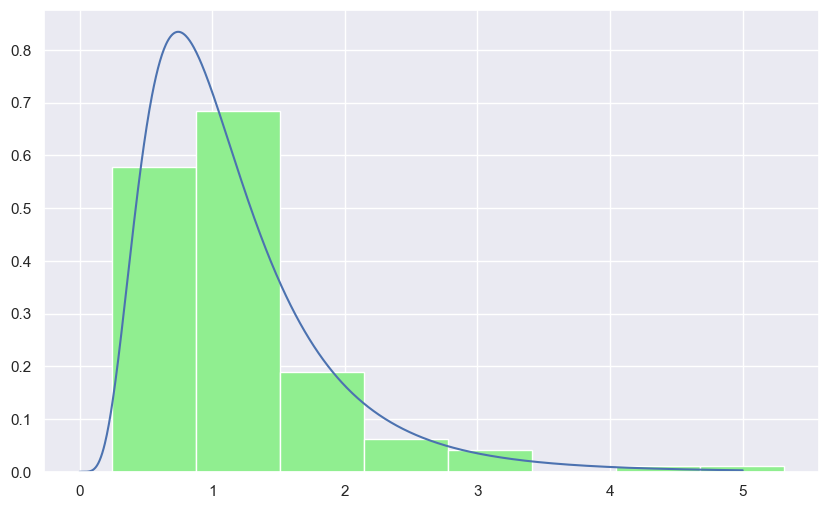

In [64]:
import seaborn as sns
import scipy.stats as st
sns.set_theme()
plt.figure(figsize=(10,6))
x = histogram['Середины интервалов']
y = [i / h for i in histogram['Относительная частота']]
plt.bar(x, y, width=h, color = 'lightgreen', label = 'Гистограмма')
x_theor = np.linspace(0, 5, 1000)
y_theor = [st.f.pdf(val, k, m) for val in x_theor]
plt.plot(x_theor, y_theor)

plt.show()

## 9. Выводы

#### Мы научились примененять критерий $χ^2$ Пирсона к проверке гипотезы о виде функции распределения. В нашей задаче мы показали, что гипотеза о распределении случайных величин по закону Фишера принимается на уровне доверения 0.99